# Método do Particionamento

Esses métodos são baseados na separação dos indivíduos em subgrupos, sendo que uma parte importante desse tipo de algoritmo é o número de subgrupos $k$ que serão formados e que deve ser informado pelo usuário. Para encontrar o melhor $k$, usamos métricas que descrevem a melhor estimativa dos grupos em relação aos dados. Dentre os métodos de particionamento, abordaremos o $k-means$.

Podemos fazer o uso do algoritmo de K-means quando possuímos um conjunto de dados não rotulados e gostaríamos de agrupá-los, para assim poder observar padrões nos dados. Posteriormente, poderia ocorrer uma análise mais aprofundada das características de cada grupo após o agrupamento, caso este aconteça. 

Para mostrar a implementação do método, iremos abordar o mesmo exemplo utilizado na parte de clusterização hierárquica, porém desta vez em utilizaremos a idade também como variavel. Abaixo as bibliotecas que usaremos.


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # biblioteca resposavel pelo Kmeans
import matplotlib.pyplot as plt # biblioteca responsavel pelo plots

In [4]:
dataset = pd.read_csv('shopping_data.csv') #importando o dataset

In [5]:
dataset.shape # vendo o tamanho do nosso dataset

(200, 5)

In [6]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


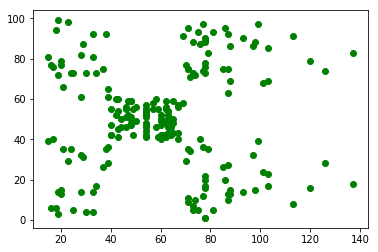

In [7]:
# Visualizando os dados
plt.plot(dataset['Annual Income (k$)'], dataset["Spending Score (1-100)"], 'go')

Apenas quantificando o dado para numerico, esta parte nao tem nenhum influencia no codigo, em vista que nao iremos usar genero no método

In [8]:

def genero(x):
    if x == 'Female':
        return "1"
    else:
        return '0'
    
dataset['Genre'] = dataset['Genre'].apply(genero)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Para facilitar nossa análise iremos tirar a variável Costumer ID pois ela nao é relevante para a demonstração.

In [9]:
dataset.drop(["CustomerID"],axis=1,inplace= True)

O algoritimo do $K-means$ funciona basicamente calculando a distância de um ou mais centros, os centróides, até os pontos do dataset usado para o aprendizado não superviosinado da máquina, a clusterização então é feita em relação a estes centros, ou seja, se um ponto $X$ está mais próximo de um determinado centro falamos que este ponto pertence ao cluster que este centro representa. Sempre ao iniciarmos o algoritimo definimos os números de centros que queremos gerar e como nosso dataset ja é conhecido e sabemos que existem 5 clusters nele, então iremos inicializar com este valor. Se fossemos utilizar outros datasets os quais não conhecemos o número de clusters, teríamos que fazer uma análise para poder descobrir o números de clusters que mais se adequa ao dataset -  mais a frente abordaremos como proceder nesses casos. 

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')

Abaixo um metodo para descobrir o numero ideal de cluster, apenas deem uma olhada para ja familiarizarem nao precisam se preocupar com entender :).

1 308862.06
2 212889.44245524297
3 143391.59236035682
4 104414.67534220166
5 75399.61541401483
6 58348.64136331505
7 51203.75391673208
8 44391.820804870804
9 40852.86916179337
10 37954.49306272813


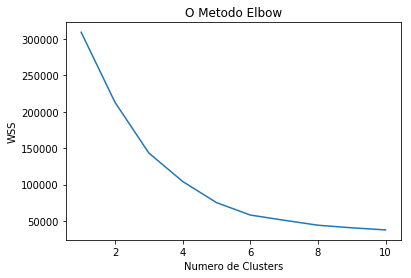

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataset)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Na chamada do método do $K-means$ vemos também, além do número de clusters, a maneira que usaremos para gerar os centros. Existem três maneiras disponibilizadas pelo pacote: 


   $k-means++$:  Método mais utilizado, sendo que na documentação não fica muito claro seu funcionamento porém sabemos que este método facilita a convergência do algoritmo;
   
   $random$ : Neste metodo os centros são gerados randomicamente dentro do espaço ocupado pelo dataset;
   
   $Por$  ultimo, podemos passar um 'ndarray' com os pontos onde desejamos que os centros sejam inicialiados.
   
   A utilização dos centros no algoritimo serve para fazer o agrupamento dos dados. Centros iniciais são gerados de acordo com um dos métodos acima e a partir dele é feito um agrupamento inicial, sendo que o algoritimo usa a distância euclidiana para decidir a qual centro o ponto pertence - ele pega a menor distância. Após este primeiro agrupamento, os centróides são recalculados como uma média dos pontos pertencentes a cada um dos clusters. Os dois processos se repetem $n$ vezes até que os centróides tenham convergido. É importante dizer que os centróides finais dependem dos centróides iniciais, ou seja, podemos repetir o processo algumas vezes com diferentes centros para checar a robustez do agrupamento.

Seguindo com nosso código, agora com um entendimento maior do método e com ele ja incializado em nosso código, vamos fazer com que a máquina aprenda a agrupar os pontos:


In [12]:
# Treinando o data set
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
#vendo a possição final dos clusters
kmeans.cluster_centers_

array([[ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.58227848, 43.12658228, 54.82278481, 49.83544304],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.48648649, 40.32432432, 87.43243243, 18.18918919]])

In [64]:
#vendo os labels,cluster gerado
labels = kmeans.labels_
labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

Pronto, agora temos nosso modelo $k-means$ treinado e pronto para uso, vamos ver se o resultado obtido pelo $k-means$ é similar ao algoritimo anterior. Para isso vamos fazer uma plotagem. O código abaixo mostra uma forma diferente de manipular os dados para plotar, neste código usamos três variáveis, porém vamos plotar apenas duas para facilitar a visualização:

In [65]:

data = 0
X = np.array(dataset['Annual Income (k$)'])
Y = np.array(dataset['Spending Score (1-100)'])
X.shape =(-1,1)
Y.shape =(-1,1)
data = np.concatenate((X,Y),axis=1)


No handles with labels found to put in legend.


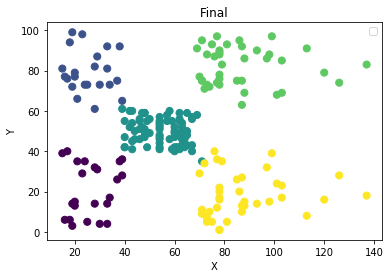

In [66]:
# plotando o grafico
plt.scatter(data[:,0], data[:,1], s = 50, c = kmeans.labels_)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Final')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

Podemos ver que os resultados são extremamente iquais, isso nos diz que o agrupamento foi robusto ao método utilizado. O método PAM que foi falado no começo da sessão é também conhecido omo k-medoids. A única diferença entre os dois modelos é que o PAM utiliza a distância Manhattan para calcular as distâncias dos pontos até os centros - isso é feito para que o modelo seja menos sensível a outliers, ou seja, pontos que estão muito "fora da curva" e que podem criar empecilhos para se chegar em um bom resultado.

# Para finalizar
Compile denovo o código acima mudando o número de clusters e compare os resultados.